# 911 Calls Capstone Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('911.csv')

#### Organizing data by reason

In [2]:
df['Reason'] = df['title'].apply(lambda x : x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


<AxesSubplot:xlabel='Reason', ylabel='count'>

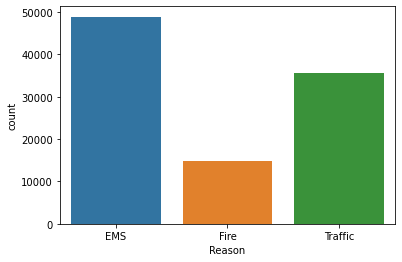

In [3]:
sns.countplot(x='Reason', data=df)

#### Reorganizing time data

In [5]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
time = df['timeStamp'].iloc[0]
df['Hour'] = df['timeStamp'].apply(lambda x : x.hour)
df['Month'] = df['timeStamp'].apply(lambda x : x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x : x.dayofweek)

dmap = {0:'Mon',
        1:'Tue',
        2:'Wed',
        3:'Thu',
        4:'Fri',
        5:'Sat',
        6:'Sun'}
df['Day of Week'] = df['Day of Week'].apply(lambda x : dmap[x])

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


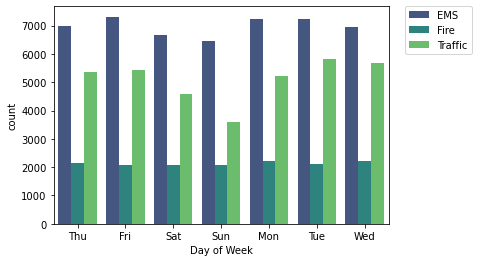

In [7]:
sns.countplot(x='Day of Week', hue='Reason', data=df, palette="viridis")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

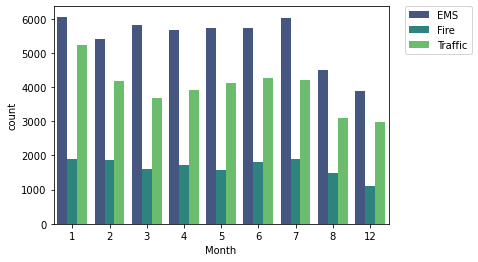

In [8]:
sns.countplot(x='Month', hue='Reason', data=df, palette="viridis")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)

#### Patching inconsistent months
i.e. observe that September through November are not represented in the data

<AxesSubplot:xlabel='Month'>

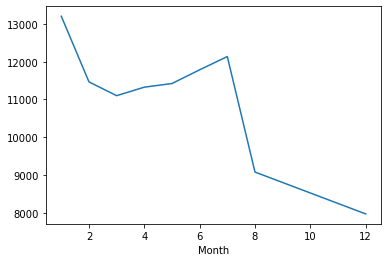

In [9]:
by_month = df.groupby('Month').count()
by_month['lat'].plot()

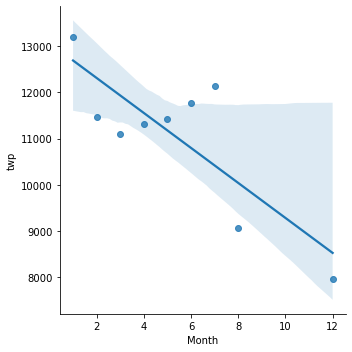

In [10]:
sns.lmplot(x="Month", y="twp", data=by_month.reset_index())

#### Plots based on date

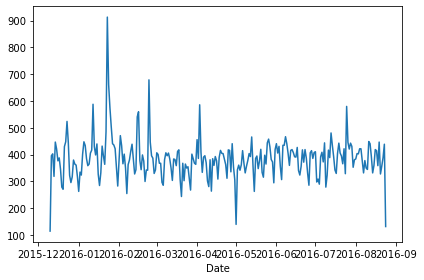

In [11]:
df['Date'] = df['timeStamp'].apply(lambda x : x.date())
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.show()


** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

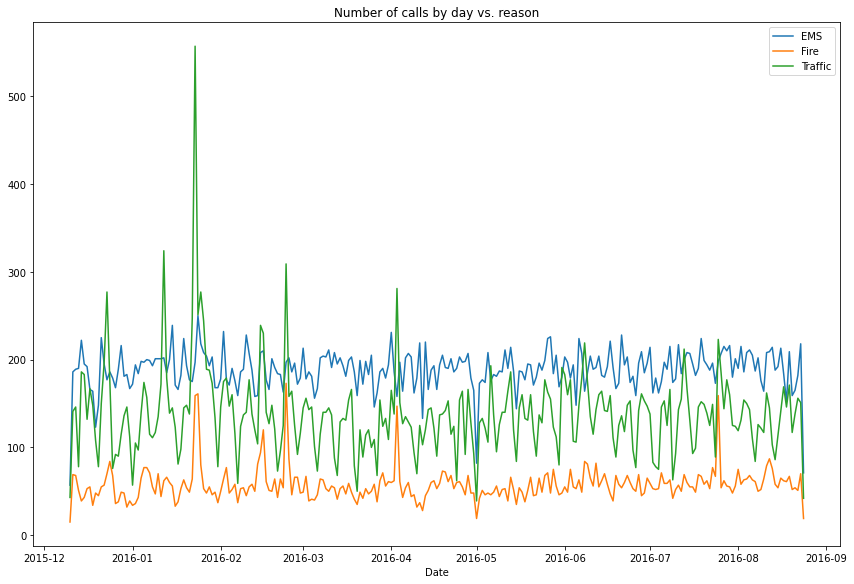

In [22]:
for reason in df['Reason'].unique():
  df[df['Reason']==reason].groupby('Date').count()['lat'].plot(label=reason, figsize=(12,8))

plt.tight_layout()
plt.legend()
plt.title("Number of calls by day vs. reason")
plt.show()

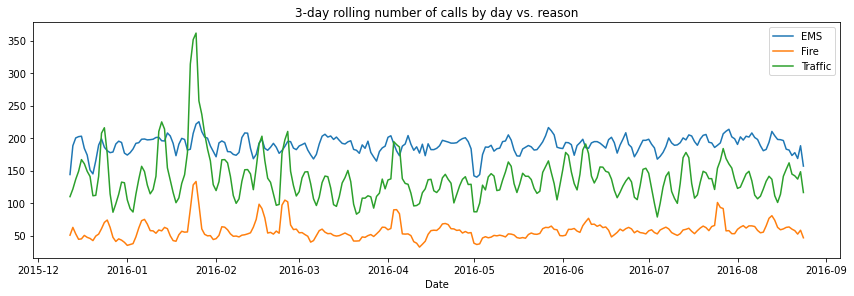

In [23]:
for reason in df['Reason'].unique():
  df[df['Reason']==reason].groupby('Date').count()['lat'].rolling(window=3).mean().plot(label=reason, figsize=(12,4))

plt.tight_layout()
plt.legend()
plt.title("3-day rolling number of calls by day vs. reason")
plt.show()

#### Testing heatmap

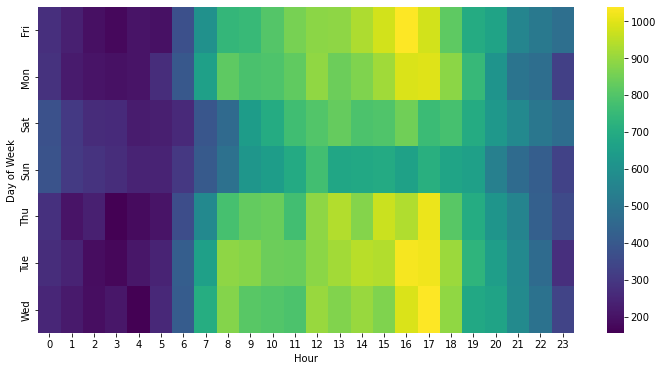

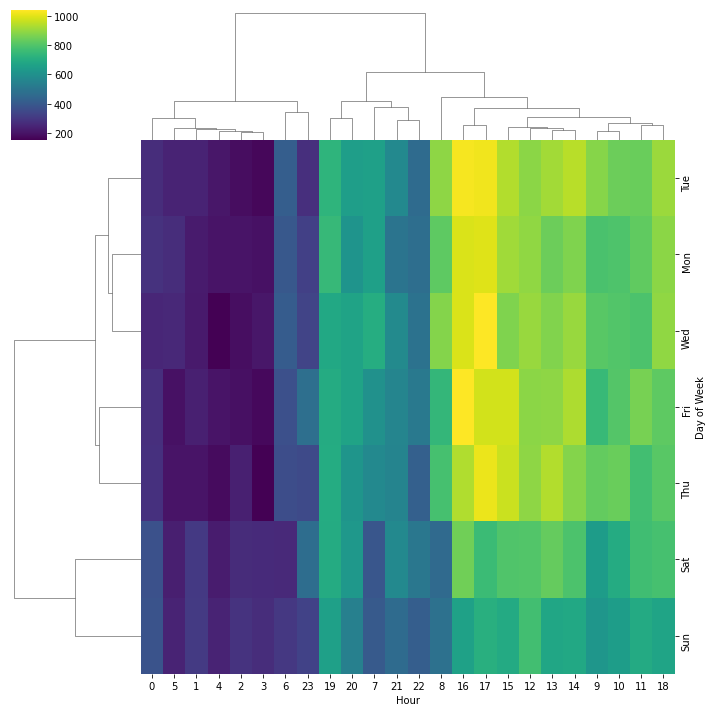

In [25]:
day_hour = df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(data=day_hour, cmap='viridis')
sns.clustermap(data=day_hour, cmap='viridis')